<a href="https://colab.research.google.com/github/AITradingLDZ04/AI-for-Trading-Nanodegree-Program/blob/master/Week_3_Lab_Syracuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the necessary libraries

In [ ]:
#Import my dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
import os
import tensorflow as tf
import pandas as pd
from pandas import read_csv

In [ ]:
# Read in memory capabilities
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Confirm the data directory
data_dir = '/content/drive/MyDrive/'

In [ ]:
# Load the data
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics 
from fbprophet import Prophet

def load_data(data_dir):
    """Load Coaches File"""

    coaches = pd.read_csv('/content/drive/MyDrive/Coaches8.csv')

    return coaches

coaches = load_data(data_dir)

In [ ]:
# First 5 Entries for Data Frame
coaches.head(5)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [ ]:
# Last 5 Entries for Data Frame
coaches.tail(5)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
125,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000"
126,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000"
127,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000"
128,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000"
129,Wyoming,Mt. West,Craig Bohl,"$1,412,000","$1,412,000","$450,000","$236,000",$0,"$8,016,667"


In [ ]:
# Describe the data
coaches.describe()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
count,130,130,130,130,130,130,130,130,130
unique,130,11,130,104,105,85,51,1,102
top,Boston College,Big Ten,Bryan Harsin,--,"$3,500,000",--,--,$0,--
freq,1,14,1,5,5,23,42,130,23


In [ ]:
# Need to drop columns with schools that do not have Total Pay, School Pay, Bonus, and Bonus Paid because wont be able to predict these values.
coaches = coaches[(coaches.School != 'Baylor') & (coaches.School != 'Brigham Young') & (coaches.School != 'Rice') & (coaches.School != 'Southern Methodist') & (coaches.School !='Temple')]

In [ ]:
# Describe the data after removing the 5 schools
coaches.describe()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
count,125,125,125,125,125,125,125,125,125
unique,125,11,125,103,104,85,51,1,102
top,Boston College,Big Ten,Bryan Harsin,"$3,500,000","$3,500,000",--,--,$0,--
freq,1,14,1,5,5,18,37,125,18


In [ ]:
# Get the meta data of the dataframe
# No null objects
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 129
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        125 non-null    object
 1   Conference    125 non-null    object
 2   Coach         125 non-null    object
 3   SchoolPay     125 non-null    object
 4   TotalPay      125 non-null    object
 5   Bonus         125 non-null    object
 6   BonusPaid     125 non-null    object
 7   AssistantPay  125 non-null    object
 8   Buyout        125 non-null    object
dtypes: object(9)
memory usage: 9.8+ KB


In [ ]:
# Remove Special Characters (including $ and ',' and --	)
# Apply to SchoolPay
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace(',', '')
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace('$', '')
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace('--', '')

# Apply to Total Pay
coaches['TotalPay'] = coaches['TotalPay'].str.replace(',', '')
coaches['TotalPay'] = coaches['TotalPay'].str.replace('$', '')
coaches['TotalPay'] = coaches['TotalPay'].str.replace('--', '')

# Apply to Bonus
coaches['Bonus'] = coaches['Bonus'].str.replace(',', '')
coaches['Bonus'] = coaches['Bonus'].str.replace('$', '')
coaches['Bonus'] = coaches['Bonus'].str.replace('--', '')

# Apply to Bonus Paid
coaches['BonusPaid'] = coaches['BonusPaid'].str.replace(',', '')
coaches['BonusPaid'] = coaches['BonusPaid'].str.replace('$', '')
coaches['BonusPaid'] = coaches['BonusPaid'].str.replace('--', '')

# Apply to AssistantPay
coaches['AssistantPay'] = coaches['AssistantPay'].str.replace(',', '')
coaches['AssistantPay'] = coaches['AssistantPay'].str.replace('$', '')
coaches['AssistantPay'] = coaches['AssistantPay'].str.replace('--', '')

# Apply to Buyout
coaches['Buyout'] = coaches['Buyout'].str.replace(',', '')
coaches['Buyout'] = coaches['Buyout'].str.replace('$', '')
coaches['Buyout'] = coaches['Buyout'].str.replace('--', '')

In [ ]:
coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,,0,
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000,145000,0,2160417


In [ ]:
coaches.tail()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
125,West Virginia,Big 12,Dana Holgorsen,3605000,3617500,1000000,90000,0,7150000
126,Western Kentucky,C-USA,Mike Sanford Jr.,800000,805850,400000,0,0,1200000
127,Western Michigan,MAC,Tim Lester,800000,800000,346500,39250,0,800000
128,Wisconsin,Big Ten,Paul Chryst,3750000,3750000,,290000,0,6000000
129,Wyoming,Mt. West,Craig Bohl,1412000,1412000,450000,236000,0,8016667


In [ ]:
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 129
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        125 non-null    object
 1   Conference    125 non-null    object
 2   Coach         125 non-null    object
 3   SchoolPay     125 non-null    object
 4   TotalPay      125 non-null    object
 5   Bonus         125 non-null    object
 6   BonusPaid     125 non-null    object
 7   AssistantPay  125 non-null    object
 8   Buyout        125 non-null    object
dtypes: object(9)
memory usage: 9.8+ KB


In [ ]:
# Convert all columns (except first 3) to integers
coaches['SchoolPay'] = pd.to_numeric(coaches['SchoolPay'], downcast='float')
coaches['TotalPay'] = pd.to_numeric(coaches['TotalPay'], downcast='float')
coaches['Bonus'] = pd.to_numeric(coaches['Bonus'], downcast='float')
coaches['BonusPaid'] = pd.to_numeric(coaches['BonusPaid'], downcast='float')
coaches['AssistantPay'] = pd.to_numeric(coaches['AssistantPay'], downcast='float')
coaches['Buyout'] = pd.to_numeric(coaches['Buyout'], downcast='float')

In [ ]:
# Check the columns were converted to integers
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 129
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   School        125 non-null    object 
 1   Conference    125 non-null    object 
 2   Coach         125 non-null    object 
 3   SchoolPay     125 non-null    float32
 4   TotalPay      125 non-null    float32
 5   Bonus         107 non-null    float32
 6   BonusPaid     88 non-null     float32
 7   AssistantPay  125 non-null    float32
 8   Buyout        107 non-null    float32
dtypes: float32(6), object(3)
memory usage: 6.8+ KB


In [ ]:
coaches.head(5)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,NaN,0.0,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0


In [ ]:
# Replace NaN with mean 0
coaches['SchoolPay'] = coaches['SchoolPay'].replace(np.nan, 0)
coaches['TotalPay'] = coaches['TotalPay'].replace(np.nan, 0)
coaches['Bonus'] = coaches['Bonus'].replace(np.nan, 0)
coaches['BonusPaid'] = coaches['BonusPaid'].replace(np.nan, 0)
coaches['AssistantPay'] = coaches['AssistantPay'].replace(np.nan, 0)
coaches['Buyout'] = coaches['Buyout'].replace(np.nan, 0)

In [ ]:
coaches.head(5)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0


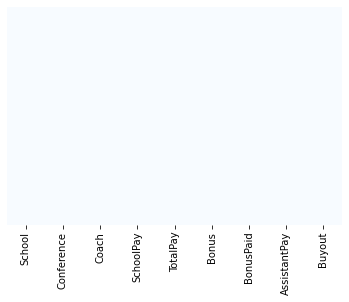

In [ ]:
# double check isNull Condition
import seaborn as sns
sns.heatmap(coaches.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Create total compensation minus Bonus Paid Column
coaches['Total Compensation'] = coaches.apply(lambda row: row.TotalPay - row.BonusPaid, axis=1)

In [ ]:
coaches

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0
...,...,...,...,...,...,...,...,...,...,...
125,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0
126,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0
127,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0
128,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0


In [ ]:
# Load the Stadium Size Data
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics 
from fbprophet import Prophet

def load_data(data_dir):
    """Load stadium_size"""

    stadium_size = pd.read_csv('/content/drive/MyDrive/stadium_size.csv')

    return stadium_size

stadium_size = load_data(data_dir)

In [ ]:
stadium_size

,Stadium,College,Conference,Capacity,Opened
0,Bright House Networks Stadium,Central Florida,AAC,45323,2007
1,Dowdy Ficklen Stadium,East Carolina,AAC,50000,1963
2,Gerald Ford Stadium,SMU,AAC,32000,2000
3,Liberty Bowl,Memphis,AAC,62380,1965
4,Lincoln Financial Field,Temple,AAC,68532,2003
...,...,...,...,...,...
123,Kidd Brewer Stadium,Appalachain State,Sun Belt,24150,1962
124,Ladd Peebles Stadium,South Alabama,Sun Belt,40646,1948
125,Malone Stadium,Louisiana-Monroe,Sun Belt,30427,1978
126,Paulson Stadium,Georgia Southern,Sun Belt,24300,1984


In [ ]:
# Rename College to School
stadium_size = stadium_size.rename(columns={"College": "School"})

In [ ]:
stadium_size

,Stadium,School,Conference,Capacity,Opened
0,Bright House Networks Stadium,Central Florida,AAC,45323,2007
1,Dowdy Ficklen Stadium,East Carolina,AAC,50000,1963
2,Gerald Ford Stadium,SMU,AAC,32000,2000
3,Liberty Bowl,Memphis,AAC,62380,1965
4,Lincoln Financial Field,Temple,AAC,68532,2003
...,...,...,...,...,...
123,Kidd Brewer Stadium,Appalachain State,Sun Belt,24150,1962
124,Ladd Peebles Stadium,South Alabama,Sun Belt,40646,1948
125,Malone Stadium,Louisiana-Monroe,Sun Belt,30427,1978
126,Paulson Stadium,Georgia Southern,Sun Belt,24300,1984


In [ ]:
# Left join stadium_size with coaches on "School"
coaches = pd.merge(coaches, stadium_size, on=['School','School'], how="left", indicator=True)

In [ ]:
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Conference_y,Capacity,Opened,_merge
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,Mountain West,52237.0,1962.0,both
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,MAC,30000.0,2009.0,both
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,SEC,101821.0,1929.0,both
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,NaN,NaN,NaN,NaN,left_only
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,Big 12,60000.0,1980.0,both
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,CUSA,22113.0,1968.0,both
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,MAC,30200.0,1939.0,both
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,Big Ten,80321.0,1917.0,both


In [ ]:
# Drop Conference_y
coaches = coaches.drop('Conference_y', axis = 1)

In [ ]:
# Drop _merge Column
coaches = coaches.drop('_merge', axis = 1)

In [ ]:
# Drop Opened Column
coaches = coaches.drop('Opened', axis = 1)

In [ ]:
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0


In [ ]:
# Fill String Values with Empty String
coaches.Stadium = coaches.Stadium.fillna('')

In [ ]:
# Check the dataframe
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0


In [ ]:
# Fill Capacity NaN with 0
coaches['Capacity'] = coaches['Capacity'].replace(np.nan, 0)

In [ ]:
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0


In [ ]:
# Check the info of the dataframe
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   School              125 non-null    object 
 1   Conference_x        125 non-null    object 
 2   Coach               125 non-null    object 
 3   SchoolPay           125 non-null    float32
 4   TotalPay            125 non-null    float32
 5   Bonus               125 non-null    float32
 6   BonusPaid           125 non-null    float32
 7   AssistantPay        125 non-null    float32
 8   Buyout              125 non-null    float32
 9   Total Compensation  125 non-null    float64
 10  Stadium             125 non-null    object 
 11  Capacity            125 non-null    float64
dtypes: float32(6), float64(2), object(4)
memory usage: 9.8+ KB


In [ ]:
# Add in more data from Rivals
# Load the Stadium Size Data
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics 
from fbprophet import Prophet

def load_data(data_dir):
    """Load rivals_2018"""

    rivals_2018 = pd.read_csv('/content/drive/MyDrive/rivals_2018.csv')

    return rivals_2018

rivals_2018 = load_data(data_dir)

In [ ]:
rivals_2018

,SCHOOL,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS
0,Georgia,1,26,8,15,3,4,3461
1,Ohio State,2,26,3,18,5,4,3192
2,Southern California,3,19,5,13,1,4,2886
3,Texas,4,27,1,17,8,4,2726
4,Penn State,5,23,2,16,4,4,2712
...,...,...,...,...,...,...,...,...
95,Bowling Green,96,24,0,0,8,2,870
96,Texas State,97,24,0,0,6,2,840
97,Troy,97,18,0,0,5,2,840
98,Nevada,99,30,0,0,6,2,780


In [ ]:
# Rename SCHOOL to School
rivals_2018 = rivals_2018.rename(columns={"SCHOOL": "School"})

In [ ]:
rivals_2018

,School,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS
0,Georgia,1,26,8,15,3,4,3461
1,Ohio State,2,26,3,18,5,4,3192
2,Southern California,3,19,5,13,1,4,2886
3,Texas,4,27,1,17,8,4,2726
4,Penn State,5,23,2,16,4,4,2712
...,...,...,...,...,...,...,...,...
95,Bowling Green,96,24,0,0,8,2,870
96,Texas State,97,24,0,0,6,2,840
97,Troy,97,18,0,0,5,2,840
98,Nevada,99,30,0,0,6,2,780


In [ ]:
# Left join stadium_size with coaches on "School"
coaches = pd.merge(coaches, rivals_2018, on=['School','School'], how="left", indicator=True)

In [ ]:
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,_merge
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0,7.0,20.0,3.0,13.0,3.0,4.0,2623.0,both
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0,33.0,24.0,0.0,4.0,19.0,3.0,1679.0,both
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0,83.0,28.0,0.0,0.0,14.0,3.0,1035.0,both
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0,70.0,23.0,0.0,1.0,9.0,2.0,1155.0,both
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0,40.0,20.0,0.0,1.0,19.0,3.0,1590.0,both


In [ ]:
coaches = coaches.drop('_merge', axis = 1)

In [ ]:
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0,7.0,20.0,3.0,13.0,3.0,4.0,2623.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0,33.0,24.0,0.0,4.0,19.0,3.0,1679.0
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0,83.0,28.0,0.0,0.0,14.0,3.0,1035.0
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0,70.0,23.0,0.0,1.0,9.0,2.0,1155.0
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0,40.0,20.0,0.0,1.0,19.0,3.0,1590.0


In [ ]:
coaches.columns

Index(['School', 'Conference_x', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus',
       'BonusPaid', 'AssistantPay', 'Buyout', 'Total Compensation', 'Stadium',
       'Capacity', 'RANK', 'TOTAL', '5 STARS', '4 STARS', '3 STARS', 'AVG',
       'POINTS'],
      dtype='object')

In [ ]:
# Fill String Values with Empty String
coaches = coaches.fillna('')

In [ ]:
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0,,,,,,,
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0,,,,,,,
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0,7,20,3,13,3,4,2623
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0,,,,,,,
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0,33,24,0,4,19,3,1679
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0,83,28,0,0,14,3,1035
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0,70,23,0,1,9,2,1155
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0,40,20,0,1,19,3,1590


In [ ]:
# Add Graduation Rate Data
# Load the Graduation Rate Data
# https://nces.ed.gov/ipeds/SummaryTables/report/817?templateId=8174&years=2019,2018,2017,2016,2015,2014,2013,2012,2011&number_or_percent=1&expand_by=0&tt=institutional&instType=2
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics 
from fbprophet import Prophet

def load_data(data_dir):
    """Load Graduation_Rate"""

    Graduation_Rate = pd.read_csv('/content/drive/MyDrive/Graduation_Rate.csv')

    return Graduation_Rate

Graduation_Rate = load_data(data_dir)

In [ ]:
# Inspect the data
Graduation_Rate

,School,Graduation_Rate
0,Air Force,0.85
1,Akron,0.51
2,Alabama,0.30
3,Alabama at Birmingham,0.63
4,Appalachian State,0.73
...,...,...
125,West Virginia,0.31
126,Western Kentucky,0.52
127,Western Michigan,0.57
128,Wisconsin,0.63


In [ ]:
# Left join Graduation_Rate with Coaches DataFrame
coaches = pd.merge(coaches, Graduation_Rate, on=['School','School'], how="left", indicator=True)

In [ ]:
# Inspect the dataframe
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,_merge
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0,,,,,,,,0.85,both
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0,,,,,,,,0.51,both
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0,7,20,3,13,3,4,2623,0.30,both
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0,,,,,,,,0.63,both
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0,,,,,,,,0.73,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0,33,24,0,4,19,3,1679,0.31,both
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0,83,28,0,0,14,3,1035,0.52,both
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0,70,23,0,1,9,2,1155,0.57,both
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0,40,20,0,1,19,3,1590,0.63,both


In [ ]:
# Drop the last column
coaches = coaches.drop('_merge', axis = 1)

In [ ]:
# Inspect the dataframe
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0,,,,,,,,0.85
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0,,,,,,,,0.51
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0,7,20,3,13,3,4,2623,0.30
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0,,,,,,,,0.63
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0,,,,,,,,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0,33,24,0,4,19,3,1679,0.31
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0,83,28,0,0,14,3,1035,0.52
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0,70,23,0,1,9,2,1155,0.57
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0,40,20,0,1,19,3,1590,0.63


In [ ]:
# Double check the metadata
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   School              125 non-null    object 
 1   Conference_x        125 non-null    object 
 2   Coach               125 non-null    object 
 3   SchoolPay           125 non-null    float32
 4   TotalPay            125 non-null    float32
 5   Bonus               125 non-null    float32
 6   BonusPaid           125 non-null    float32
 7   AssistantPay        125 non-null    float32
 8   Buyout              125 non-null    float32
 9   Total Compensation  125 non-null    float64
 10  Stadium             125 non-null    object 
 11  Capacity            125 non-null    float64
 12  RANK                125 non-null    object 
 13  TOTAL               125 non-null    object 
 14  5 STARS             125 non-null    object 
 15  4 STARS             125 non-null    object 
 16  3 STARS 

In [ ]:
# Convert remaining obhects to floats
# Convert all columns (except first 3) to integers
coaches['RANK'] = pd.to_numeric(coaches['RANK'], downcast='float')
coaches['TOTAL'] = pd.to_numeric(coaches['TOTAL'], downcast='float')
coaches['5 STARS'] = pd.to_numeric(coaches['5 STARS'], downcast='float')
coaches['4 STARS'] = pd.to_numeric(coaches['4 STARS'], downcast='float')
coaches['3 STARS'] = pd.to_numeric(coaches['3 STARS'], downcast='float')
coaches['AVG'] = pd.to_numeric(coaches['AVG'], downcast='float')
coaches['POINTS'] = pd.to_numeric(coaches['POINTS'], downcast='float')
coaches['Graduation_Rate'] = pd.to_numeric(coaches['Graduation_Rate'], downcast='float')

In [ ]:
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   School              125 non-null    object 
 1   Conference_x        125 non-null    object 
 2   Coach               125 non-null    object 
 3   SchoolPay           125 non-null    float32
 4   TotalPay            125 non-null    float32
 5   Bonus               125 non-null    float32
 6   BonusPaid           125 non-null    float32
 7   AssistantPay        125 non-null    float32
 8   Buyout              125 non-null    float32
 9   Total Compensation  125 non-null    float64
 10  Stadium             125 non-null    object 
 11  Capacity            125 non-null    float64
 12  RANK                95 non-null     float32
 13  TOTAL               95 non-null     float32
 14  5 STARS             95 non-null     float32
 15  4 STARS             95 non-null     float32
 16  3 STARS 

In [ ]:
# Label the Categorical Variales
coaches["School"] = coaches["School"].astype('category')
coaches["Coach"] = coaches["Coach"].astype('category')
coaches["Conference_x"] = coaches["Conference_x"].astype('category')
coaches["Stadium"] = coaches["Stadium"].astype('category')

In [ ]:
# Create new columns with categories converted into numbers
coaches["School_cat"] = coaches["School"].cat.codes
coaches["Coach_cat"] = coaches["Coach"].cat.codes
coaches["Conference_x_cat"] = coaches["Conference_x"].cat.codes
coaches["Stadium_cat"] = coaches["Stadium"].cat.codes
coaches.head()

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,School_cat,Coach_cat,Conference_x_cat,Stadium_cat
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0,119,7,31
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.51,1,114,6,43
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0,7.0,20.0,3.0,13.0,3.0,4.0,2623.0,0.30,2,94,9,16
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,3,1,4,0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,4,106,10,0


In [ ]:
coaches[coaches['School'] == 'Syracuse']

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,School_cat,Coach_cat,Conference_x_cat,Stadium_cat
98,Syracuse,ACC,Dino Babers,2401206.0,2401206.0,0.0,0.0,0.0,0.0,2401206.0,Carrier Dome,49250.0,64.0,20.0,0.0,0.0,15.0,3.0,1230.0,0.83,98,35,1,21


In [ ]:
coaches[coaches['Conference_x'] == 'Big Ten']

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,School_cat,Coach_cat,Conference_x_cat,Stadium_cat
40,Illinois,Big Ten,Lovie Smith,5000000.0,5000000.0,1000000.0,50000.0,0.0,12636991.0,4950000.0,Memorial Stadium,60670.0,50.0,25.0,0.0,3.0,13.0,3.0,1409.0,0.61,40,72,3,61
41,Indiana,Big Ten,Tom Allen,1830000.0,1830000.0,1441668.0,0.0,0.0,2000000.0,1830000.0,Memorial Stadium,52959.0,45.0,26.0,0.0,1.0,21.0,3.0,1485.0,0.41,41,116,3,61
42,Iowa,Big Ten,Kirk Ferentz,4700000.0,4700000.0,2875000.0,600000.0,0.0,22396250.0,4100000.0,Kinnick Stadium,70585.0,40.0,23.0,0.0,4.0,14.0,3.0,1590.0,0.72,42,65,3,51
55,Maryland,Big Ten,DJ Durkin,2512000.0,2512000.0,625000.0,0.0,0.0,5096178.0,2512000.0,Byrd Stadium,54000.0,29.0,23.0,0.0,6.0,16.0,3.0,1711.0,0.87,55,24,3,18
60,Michigan,Big Ten,Jim Harbaugh,7504000.0,7504000.0,1325000.0,150000.0,0.0,17111110.0,7354000.0,Michigan Stadium,107601.0,24.0,19.0,0.0,7.0,11.0,3.0,1766.0,0.93,60,53,3,63
61,Michigan State,Big Ten,Mark Dantonio,4390417.0,4390417.0,650000.0,125000.0,0.0,7000000.0,4265417.0,Spartan Stadium,75005.0,26.0,22.0,0.0,5.0,16.0,3.0,1745.0,0.81,61,76,3,87
63,Minnesota,Big Ten,P.J. Fleck,3550000.0,3550000.0,900000.0,0.0,0.0,9291667.0,3550000.0,TCF Bank Stadium,50805.0,43.0,26.0,0.0,3.0,22.0,3.0,1555.0,0.83,63,95,3,90
68,Nebraska,Big Ten,Scott Frost,5000000.0,5000000.0,950000.0,0.0,0.0,25416668.0,5000000.0,Memorial Stadium,92000.0,21.0,25.0,0.0,9.0,15.0,3.0,1872.0,0.65,68,105,3,61
77,Northwestern,Big Ten,Pat Fitzgerald,3619775.0,3619775.0,0.0,0.0,0.0,0.0,3619775.0,Ryan Field,47130.0,60.0,18.0,0.0,1.0,15.0,3.0,1255.0,0.94,77,96,3,81
80,Ohio State,Big Ten,Urban Meyer,7600000.0,7600000.0,775000.0,350000.0,0.0,38058400.0,7250000.0,Ohio Stadium,102329.0,2.0,26.0,3.0,18.0,5.0,4.0,3192.0,0.86,80,121,3,68


In [ ]:
coaches

,School,Conference_x,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Stadium,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,School_cat,Coach_cat,Conference_x_cat,Stadium_cat
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,Falcon Stadium,52237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0,119,7,31
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,InfoCision Stadium,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.51,1,114,6,43
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,Bryant Denny Stadium,101821.0,7.0,20.0,3.0,13.0,3.0,4.0,2623.0,0.30,2,94,9,16
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,3,1,4,0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,4,106,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,Mountaineer Field,60000.0,33.0,24.0,0.0,4.0,19.0,3.0,1679.0,0.31,120,28,2,64
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,LT Smith Stadium,22113.0,83.0,28.0,0.0,0.0,14.0,3.0,1035.0,0.52,121,91,4,53
122,Western Michigan,MAC,Tim Lester,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,Waldo Stadium,30200.0,70.0,23.0,0.0,1.0,9.0,2.0,1155.0,0.57,122,115,6,98
123,Wisconsin,Big Ten,Paul Chryst,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,Camp Randall Stadium,80321.0,40.0,20.0,0.0,1.0,19.0,3.0,1590.0,0.63,123,98,3,20


In [ ]:
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   School              125 non-null    category
 1   Conference_x        125 non-null    category
 2   Coach               125 non-null    category
 3   SchoolPay           125 non-null    float32 
 4   TotalPay            125 non-null    float32 
 5   Bonus               125 non-null    float32 
 6   BonusPaid           125 non-null    float32 
 7   AssistantPay        125 non-null    float32 
 8   Buyout              125 non-null    float32 
 9   Total Compensation  125 non-null    float64 
 10  Stadium             125 non-null    category
 11  Capacity            125 non-null    float64 
 12  RANK                95 non-null     float32 
 13  TOTAL               95 non-null     float32 
 14  5 STARS             95 non-null     float32 
 15  4 STARS             95 non-null     floa

In [ ]:
# Drop the non numerical columns
coaches = coaches.drop('School', axis = 1)
coaches = coaches.drop('Conference_x', axis = 1)
coaches = coaches.drop('Coach', axis = 1)
coaches = coaches.drop('Stadium', axis = 1)

In [ ]:
# Inspect the data 
coaches

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Compensation,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,School_cat,Coach_cat,Conference_x_cat,Stadium_cat
0,885000.0,885000.0,247000.0,0.0,0.0,0.0,885000.0,52237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0,119,7,31
1,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,362500.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.51,1,114,6,43
2,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,7807000.0,101821.0,7.0,20.0,3.0,13.0,3.0,4.0,2623.0,0.30,2,94,9,16
3,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,734529.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,3,1,4,0
4,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,567500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,4,106,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,3527500.0,60000.0,33.0,24.0,0.0,4.0,19.0,3.0,1679.0,0.31,120,28,2,64
121,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,805850.0,22113.0,83.0,28.0,0.0,0.0,14.0,3.0,1035.0,0.52,121,91,4,53
122,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,760750.0,30200.0,70.0,23.0,0.0,1.0,9.0,2.0,1155.0,0.57,122,115,6,98
123,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,3460000.0,80321.0,40.0,20.0,0.0,1.0,19.0,3.0,1590.0,0.63,123,98,3,20


In [ ]:
# Fill String Values with Empty String
coaches = coaches.fillna('')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce1167e208>,
      dtype=object)

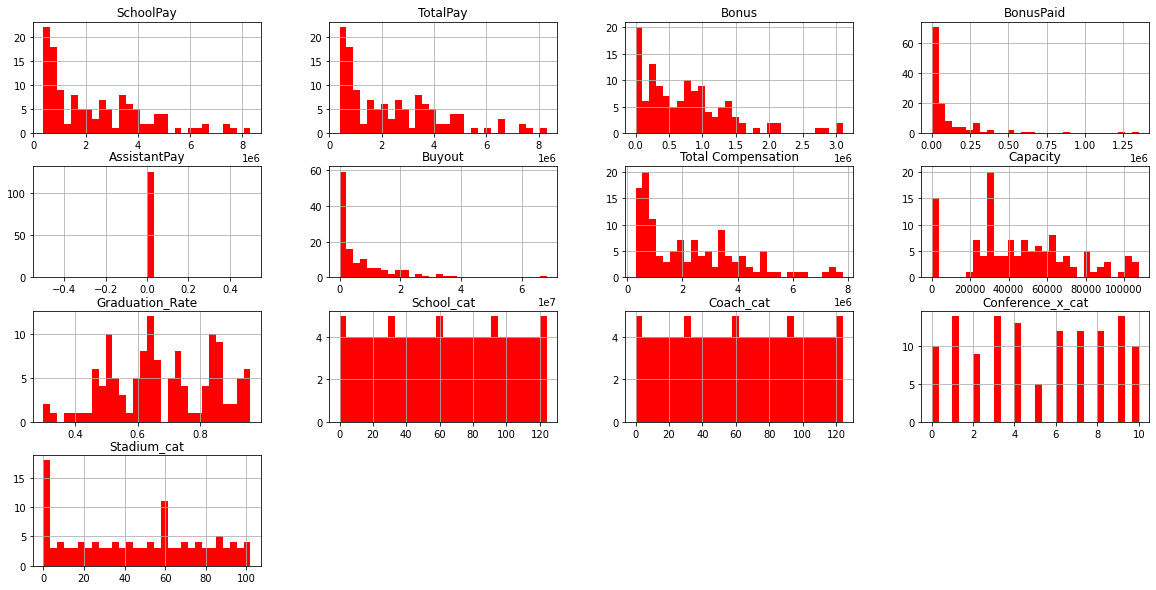

In [ ]:
# Create a Histogram of the variables
coaches.hist(bins = 30, figsize = (20,10), color = 'r')

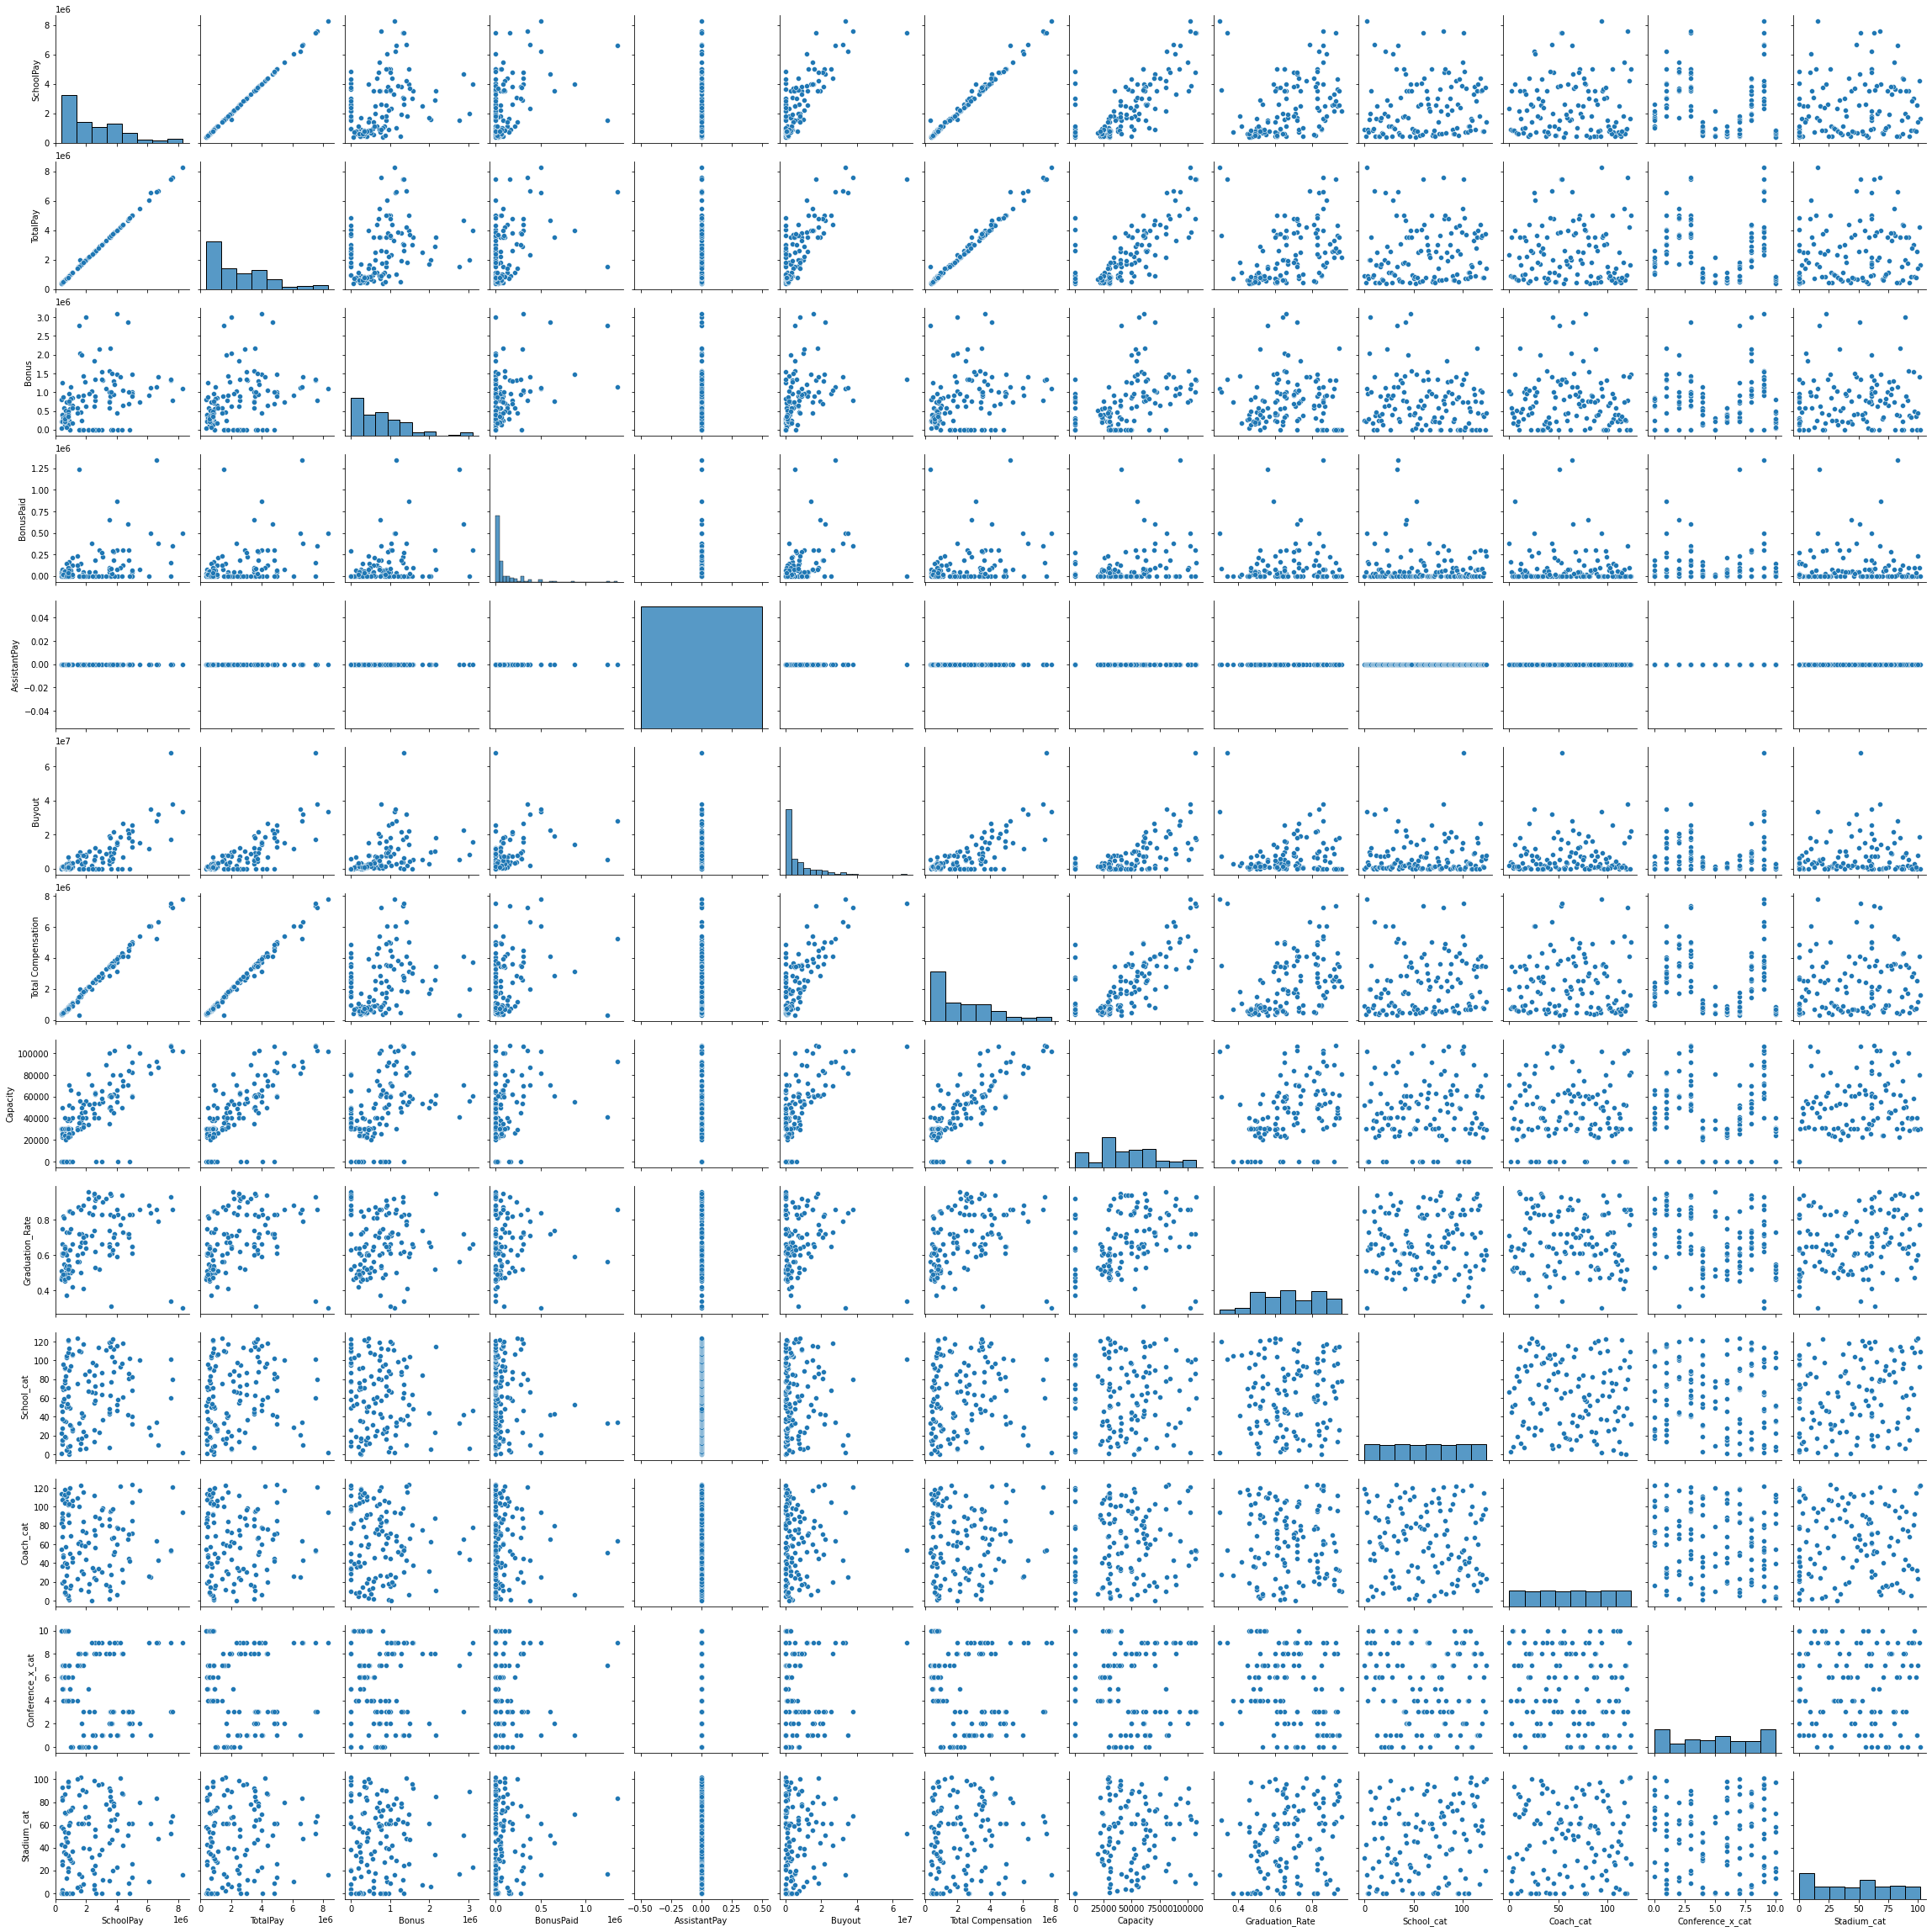

In [ ]:
# plot pairplot
sns.pairplot(coaches)

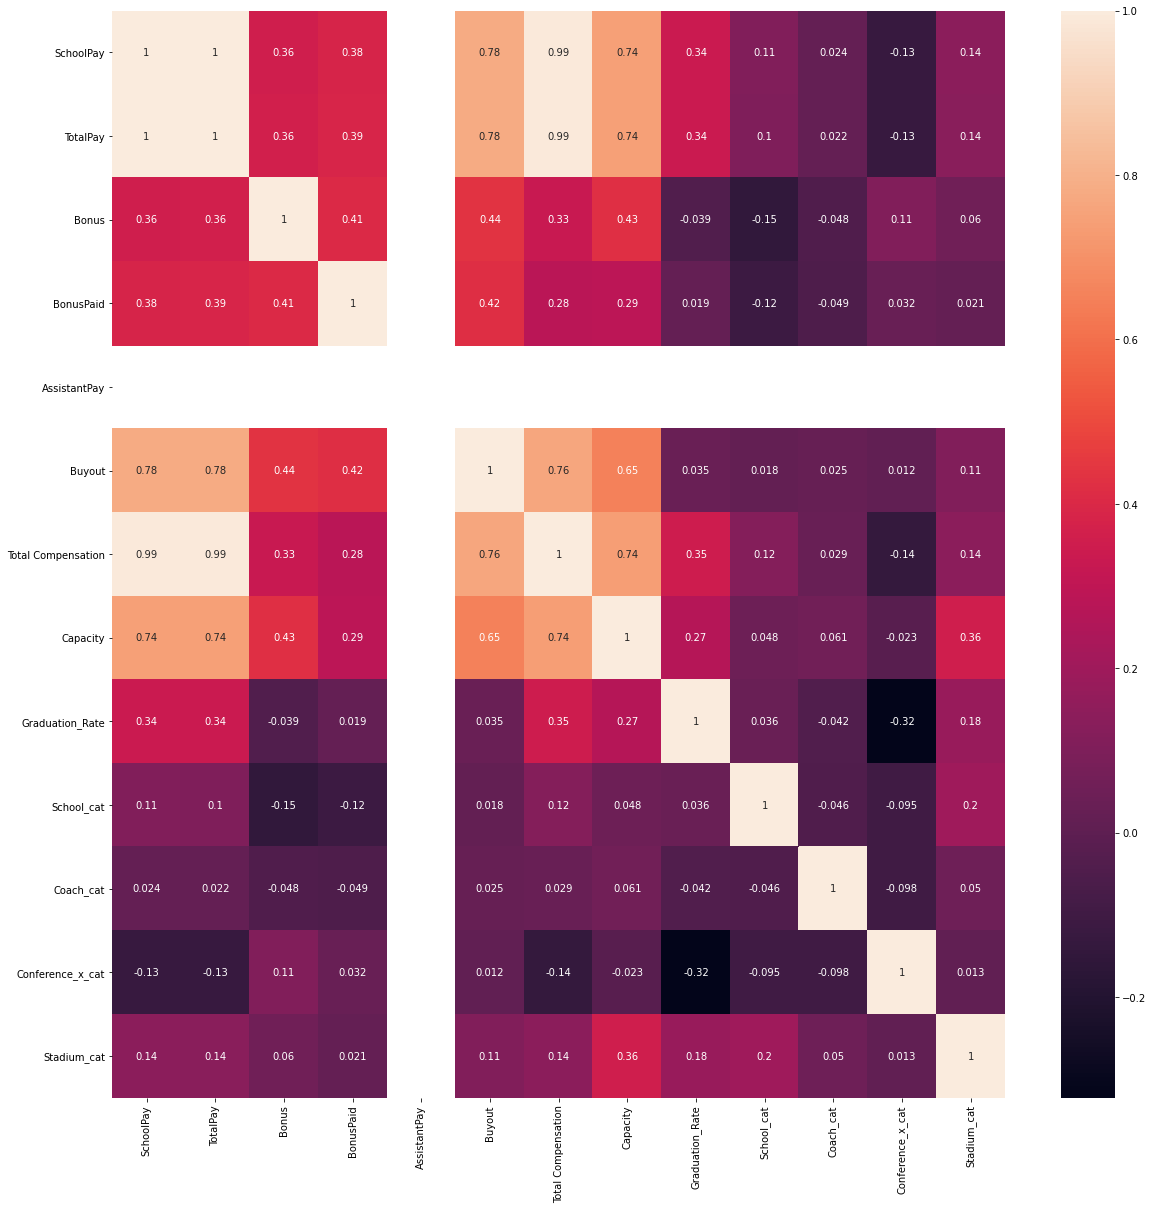

In [ ]:
# Create a heatmap to detect correlation among variables
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
corr_matrix = coaches.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
# check the columns
coaches.columns

Index(['SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout',
       'Total Compensation', 'Capacity', 'RANK', 'TOTAL', '5 STARS', '4 STARS',
       '3 STARS', 'AVG', 'POINTS', 'Graduation_Rate', 'School_cat',
       'Coach_cat', 'Conference_x_cat', 'Stadium_cat'],
      dtype='object')

In [ ]:
# Create testing and training dataset
X = coaches[['SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout', 'Capacity', 'RANK', 'TOTAL', '5 STARS', '4 STARS',
       '3 STARS', 'AVG', 'POINTS', 'Graduation_Rate', 'School_cat',
       'Coach_cat', 'Conference_x_cat', 'Stadium_cat']]
y = coaches[['Total Compensation']]

In [ ]:
X

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,School_cat,Coach_cat,Conference_x_cat,Stadium_cat
0,885000.0,885000.0,247000.0,0.0,0.0,0.0,52237.0,,,,,,,,0.85,0,119,7,31
1,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,30000.0,,,,,,,,0.51,1,114,6,43
2,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,101821.0,7,20,3,13,3,4,2623,0.30,2,94,9,16
3,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,0.0,,,,,,,,0.63,3,1,4,0
4,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,0.0,,,,,,,,0.73,4,106,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,60000.0,33,24,0,4,19,3,1679,0.31,120,28,2,64
121,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,22113.0,83,28,0,0,14,3,1035,0.52,121,91,4,53
122,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,30200.0,70,23,0,1,9,2,1155,0.57,122,115,6,98
123,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,80321.0,40,20,0,1,19,3,1590,0.63,123,98,3,20


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SchoolPay         125 non-null    float64
 1   TotalPay          125 non-null    float64
 2   Bonus             125 non-null    float64
 3   BonusPaid         125 non-null    float64
 4   AssistantPay      125 non-null    float64
 5   Buyout            125 non-null    float64
 6   Capacity          125 non-null    float64
 7   RANK              125 non-null    object 
 8   TOTAL             125 non-null    object 
 9   5 STARS           125 non-null    object 
 10  4 STARS           125 non-null    object 
 11  3 STARS           125 non-null    object 
 12  AVG               125 non-null    object 
 13  POINTS            125 non-null    object 
 14  Graduation_Rate   125 non-null    float64
 15  School_cat        125 non-null    int8   
 16  Coach_cat         125 non-null    int8   
 1

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Total Compensation  125 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [ ]:
# Convert remaining obhects to floats
# Convert all columns (except first 3) to integers
X['RANK'] = pd.to_numeric(X['RANK'], downcast='float')
X['TOTAL'] = pd.to_numeric(X['TOTAL'], downcast='float')
X['5 STARS'] = pd.to_numeric(X['5 STARS'], downcast='float')
X['4 STARS'] = pd.to_numeric(X['4 STARS'], downcast='float')
X['3 STARS'] = pd.to_numeric(X['3 STARS'], downcast='float')
X['AVG'] = pd.to_numeric(X['AVG'], downcast='float')
X['POINTS'] = pd.to_numeric(X['POINTS'], downcast='float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
# Fill Capacity NaN with 0
X = X.replace(np.nan, 0)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SchoolPay         125 non-null    float64
 1   TotalPay          125 non-null    float64
 2   Bonus             125 non-null    float64
 3   BonusPaid         125 non-null    float64
 4   AssistantPay      125 non-null    float64
 5   Buyout            125 non-null    float64
 6   Capacity          125 non-null    float64
 7   RANK              125 non-null    float32
 8   TOTAL             125 non-null    float32
 9   5 STARS           125 non-null    float32
 10  4 STARS           125 non-null    float32
 11  3 STARS           125 non-null    float32
 12  AVG               125 non-null    float32
 13  POINTS            125 non-null    float32
 14  Graduation_Rate   125 non-null    float64
 15  School_cat        125 non-null    int8   
 16  Coach_cat         125 non-null    int8   
 1

In [ ]:
X.shape

(125, 19)

In [ ]:
y.shape

(125, 1)

In [ ]:
X

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Capacity,RANK,TOTAL,5 STARS,4 STARS,3 STARS,AVG,POINTS,Graduation_Rate,School_cat,Coach_cat,Conference_x_cat,Stadium_cat
0,885000.0,885000.0,247000.0,0.0,0.0,0.0,52237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0,119,7,31
1,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,1,114,6,43
2,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,101821.0,7.0,20.0,3.0,13.0,3.0,4.0,2623.0,0.30,2,94,9,16
3,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,3,1,4,0
4,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,4,106,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3605000.0,3617500.0,1000000.0,90000.0,0.0,7150000.0,60000.0,33.0,24.0,0.0,4.0,19.0,3.0,1679.0,0.31,120,28,2,64
121,800000.0,805850.0,400000.0,0.0,0.0,1200000.0,22113.0,83.0,28.0,0.0,0.0,14.0,3.0,1035.0,0.52,121,91,4,53
122,800000.0,800000.0,346500.0,39250.0,0.0,800000.0,30200.0,70.0,23.0,0.0,1.0,9.0,2.0,1155.0,0.57,122,115,6,98
123,3750000.0,3750000.0,0.0,290000.0,0.0,6000000.0,80321.0,40.0,20.0,0.0,1.0,19.0,3.0,1590.0,0.63,123,98,3,20


In [ ]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train

array([[8.0000e+05, 8.0585e+05, 4.0000e+05, ..., 9.1000e+01, 4.0000e+00,
        5.3000e+01],
       [8.3070e+06, 8.3070e+06, 1.1000e+06, ..., 9.4000e+01, 9.0000e+00,
        1.6000e+01],
       [1.6290e+06, 1.6290e+06, 0.0000e+00, ..., 1.2300e+02, 0.0000e+00,
        1.0200e+02],
       ...,
       [1.4120e+06, 1.4120e+06, 4.5000e+05, ..., 2.3000e+01, 7.0000e+00,
        1.0000e+02],
       [3.0000e+06, 3.0000e+06, 1.5500e+06, ..., 8.1000e+01, 9.0000e+00,
        9.6000e+01],
       [5.6900e+05, 5.6900e+05, 2.2000e+05, ..., 1.1000e+02, 1.0000e+01,
        3.6000e+01]], dtype=float32)

In [ ]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9999999999999178

In [ ]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[-8.2428187e-06  1.0000086e+00 -2.9802322e-07 -9.9999988e-01
  -1.7881393e-07 -1.1920929e-07  6.8009831e-07 -3.8130584e-05
  -3.1884739e-04  1.5162586e-04  4.4142536e-04 -1.6234857e-03
  -3.4462049e-05  9.0012618e-06  6.4566543e-06 -3.2567128e-04
  -3.6272558e-04 -5.9953501e-04  1.3490667e-04]]
Linear Model Coefficient (b):  [0.25]


In [ ]:
# Evalute Trained Model
y_predict = regresssion_model_sklearn.predict(X_test)

In [ ]:
X_test

array([[2.3500000e+06, 2.3500000e+06, 1.0250000e+06, 3.7500000e+05,
        0.0000000e+00, 1.9125000e+06, 7.1004000e+04, 3.9000000e+01,
        2.6000000e+01, 0.0000000e+00, 2.0000000e+00, 1.8000000e+01,
        3.0000000e+00, 1.5910000e+03, 7.0999998e-01, 6.6000000e+01,
        0.0000000e+00, 9.0000000e+00, 3.2000000e+01],
       [2.6000000e+06, 2.6000000e+06, 1.3500000e+06, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.4038000e+04, 2.5000000e+01,
        2.3000000e+01, 0.0000000e+00, 7.0000000e+00, 1.4000000e+01,
        3.0000000e+00, 1.7650000e+03, 6.2000000e-01, 6.5000000e+01,
        5.6000000e+01, 9.0000000e+00, 2.4000000e+01],
       [4.3722800e+05, 4.3722800e+05, 2.4500000e+05, 8.1250000e+04,
        0.0000000e+00, 8.7445600e+05, 2.3724000e+04, 9.6000000e+01,
        2.4000000e+01, 0.0000000e+00, 0.0000000e+00, 8.0000000e+00,
        2.0000000e+00, 8.7000000e+02, 6.0000002e-01, 1.4000000e+01,
        8.6000000e+01, 6.0000000e+00, 2.8000000e+01],
       [1.1000000e+06,

In [ ]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
results = y_predict
results = pd.DataFrame(results,
                   columns=['Prediction'])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results

,Prediction
0,1975000.500
1,2600000.500
2,355978.188
3,971000.312
4,440000.125
5,930000.312
6,309999.469
7,3713599.000
8,760750.250
9,500000.219


In [ ]:
#What is the recommended salary for the Syracuse football coach?
# 2401206.0	2401206.0	0.0	0.0	0.0	0.0	2401206.0	Carrier Dome	49250.0	64.0	20.0	0.0	0.0	15.0	3.0	1230.0	0.83	98	35	1	21
syracuse = np.array([[2401206.0,	2401206.0,	0.0,	0.0,	0.0,	0.0,49250.0,	64.0,	20.0,	0.0,	0.0,	15.0,	3.0,	1230.0,	0.83,	98,	35,	1,	21]]).astype('float')

In [ ]:
syracuse = regresssion_model_sklearn.predict(syracuse)

In [ ]:
# The recommended salary for the Syracuse football coach is $2,401,204.99
print(syracuse)

[[2401207.035932]]


In [ ]:
# What would his salary be if we were still in the Big East? What if we went to the Big Ten?
# Big East is not part of the training data and does not include Football - the prediction model would not be able to accurately predict this result. 
# Big Ten:

#What is the recommended salary for the Syracuse football coach if at Big Ten?
syracuse = np.array([[2401206.0,	2401206.0,	0.0,	0.0,	0.0,	0.0,49250.0,	64.0,	20.0,	0.0,	0.0,	15.0,	3.0,	1230.0,	0.83,	98,	35,	3,	21]]).astype('float')

In [ ]:
syracuse = regresssion_model_sklearn.predict(syracuse)

In [ ]:
# The recommended salary for the Syracuse football coach is $2,401,204.98
print(syracuse)

[[2401207.034733]]


In [ ]:
# What schools did we drop from our data, and why?
# Need to drop columns with schools that do not have Total Pay, School Pay, Bonus, and Bonus Paid because wont be able to predict these values.
# coaches = coaches[(coaches.School != 'Baylor') & (coaches.School != 'Brigham Young') & (coaches.School != 'Rice') & (coaches.School != 'Southern Methodist') & (coaches.School !='Temple')]

In [ ]:
# What effect does graduation rate have on the projected salary?
'''
The slope for the projected graduation rate variable is 4.9061597e-05
The correlation between the projected graduation rate variable and the total compensation variable per the heat map is .35.
Thus, the 35% of the variance in Total Compensation can be explained by the graduation rate
'''

'\nThe slope for the projected graduation rate variable is 4.9061597e-05\nThe correlation between the projected graduation rate variable and the total compensation variable per the heat map is .35.\nThus, the 35% of the variance in Total Compensation can be explained by the graduation rate\n'

In [ ]:
# How good is our model?
'''
The model accuracy is 99.99%
'''

'\nThe model accuracy is 99.99%\n'

In [ ]:
# What is the single biggest impact on salary size?
'''
Buyout (.76) and Capacity (.74) have the largest inpmact on the salary size. 
Buyout and Capacity have a strong correlation with the dependent variable at .76 and .74 R-Squared values
'''

'\nBuyout (.76) and Capacity (.74) have the largest inpmact on the salary size. \nBuyout and Capacity have a strong correlation with the dependent variable at .76 and .74 R-Squared values\n'